## Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter

## Importing Dataset and Preprocessing

In [2]:
df = pd.read_csv("movies.csv")
df.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [3]:
print("Shape",df.shape)

Shape (4803, 24)


In [4]:
print("Info", df.info)

Info <bound method DataFrame.info of       index     budget                                    genres  \
0         0  237000000  Action Adventure Fantasy Science Fiction   
1         1  300000000                  Adventure Fantasy Action   
2         2  245000000                    Action Adventure Crime   
3         3  250000000               Action Crime Drama Thriller   
4         4  260000000          Action Adventure Science Fiction   
...     ...        ...                                       ...   
4798   4798     220000                     Action Crime Thriller   
4799   4799       9000                            Comedy Romance   
4800   4800          0             Comedy Drama Romance TV Movie   
4801   4801          0                                       NaN   
4802   4802          0                               Documentary   

                                               homepage      id  \
0                           http://www.avatarmovie.com/   19995   
1          h

In [5]:
#Checking for null values
df.isnull().sum()

index                      0
budget                     0
genres                    28
homepage                3091
id                         0
keywords                 412
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                      43
crew                       0
director                  30
dtype: int64

In [6]:
#Cleaning the dataset
df.isnull().sum()

index                      0
budget                     0
genres                    28
homepage                3091
id                         0
keywords                 412
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                      43
crew                       0
director                  30
dtype: int64

In [7]:
#Cleaning the DataSet
movies_df = df.drop(columns=["homepage", "production_countries","status","tagline","spoken_languages"])
movies_df.isnull().sum()

index                     0
budget                    0
genres                   28
id                        0
keywords                412
original_language         0
original_title            0
overview                  3
popularity                0
production_companies      0
release_date              1
revenue                   0
runtime                   2
title                     0
vote_average              0
vote_count                0
cast                     43
crew                      0
director                 30
dtype: int64

In [8]:
movies_df = movies_df.dropna()
movies_df.shape

(4375, 19)

In [9]:
movies_df.head()

,index,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,880674609,148.0,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,284139100,132.0,John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [10]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4375 entries, 0 to 4802
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4375 non-null   int64  
 1   budget                4375 non-null   int64  
 2   genres                4375 non-null   object 
 3   id                    4375 non-null   int64  
 4   keywords              4375 non-null   object 
 5   original_language     4375 non-null   object 
 6   original_title        4375 non-null   object 
 7   overview              4375 non-null   object 
 8   popularity            4375 non-null   float64
 9   production_companies  4375 non-null   object 
 10  release_date          4375 non-null   object 
 11  revenue               4375 non-null   int64  
 12  runtime               4375 non-null   float64
 13  title                 4375 non-null   object 
 14  vote_average          4375 non-null   float64
 15  vote_count            4375

In [11]:
# Convert 'release_date' to datetime (adjust the format if necessary)
print(movies_df["release_date"].head(10)) 
print(movies_df["release_date"].dtype)
print(movies_df["release_date"].isnull().sum())
# See all unique values
print(movies_df["release_date"].unique())  
movies_df["release_date"] = movies_df["release_date"].astype(str)
invalid_dates = movies_df[~movies_df["release_date"].str.match(r"^\d{4}-\d{2}-\d{2}$", na=False)]
print(invalid_dates)
movies_df["release_date"] = movies_df["release_date"].str.strip()
movies_df["release_date"] = pd.to_datetime(movies_df["release_date"], errors="coerce")
print("null_values",movies_df["release_date"].isnull().sum())
print(movies_df["release_date"].head())
 

0    2009-12-10
1    2007-05-19
2    2015-10-26
3    2012-07-16
4    2012-03-07
5    2007-05-01
6    2010-11-24
7    2015-04-22
8    2009-07-07
9    2016-03-23
Name: release_date, dtype: object
object
0
['2009-12-10' '2007-05-19' '2015-10-26' ... '2004-10-08' '1992-09-04'
 '2013-10-13']
Empty DataFrame
Columns: [index, budget, genres, id, keywords, original_language, original_title, overview, popularity, production_companies, release_date, revenue, runtime, title, vote_average, vote_count, cast, crew, director]
Index: []
null_values 0
0   2009-12-10
1   2007-05-19
2   2015-10-26
3   2012-07-16
4   2012-03-07
Name: release_date, dtype: datetime64[ns]


## Exploratory Data Analysis

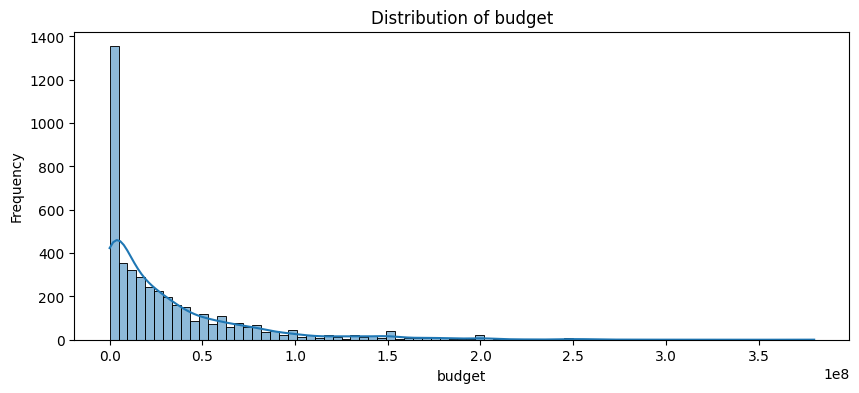

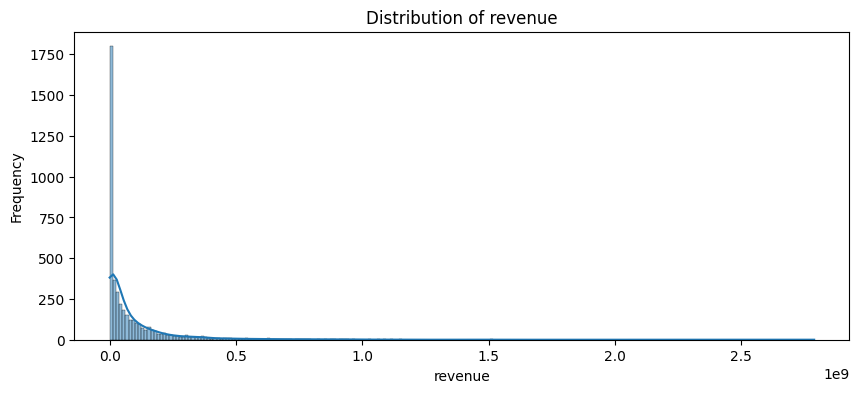

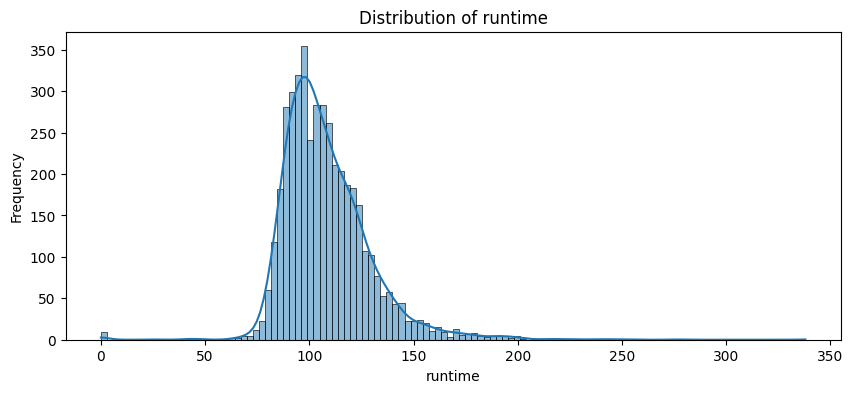

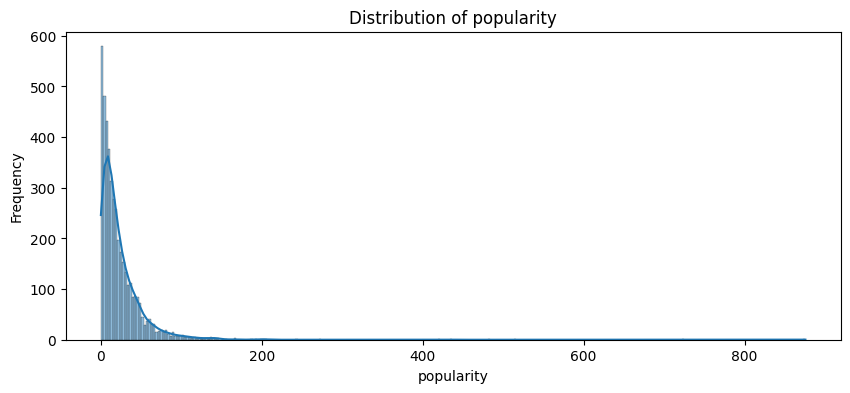

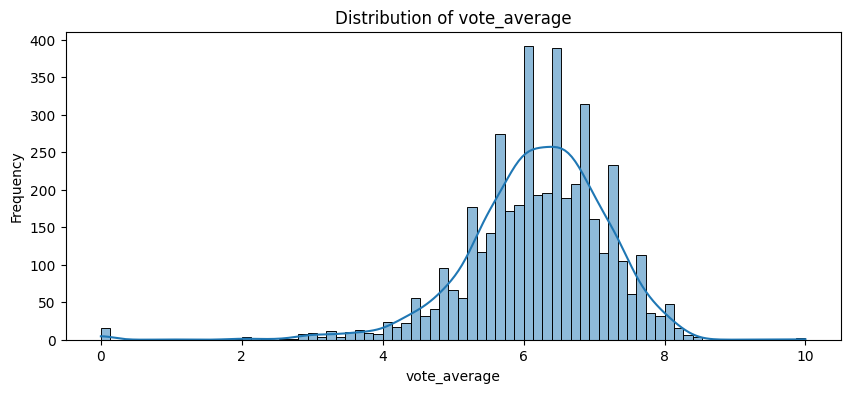

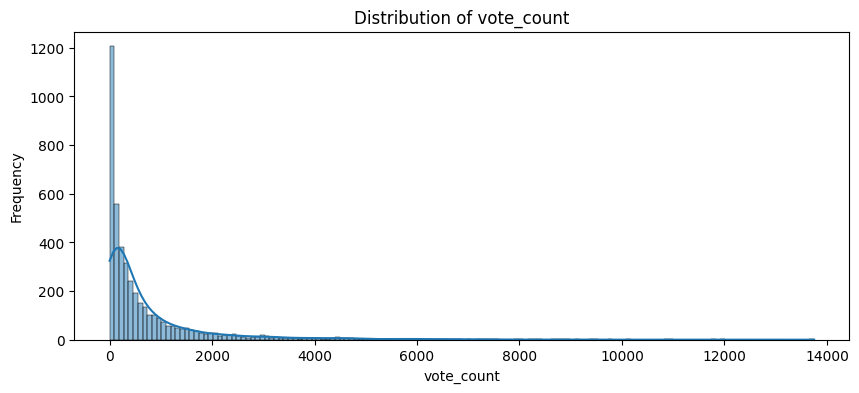

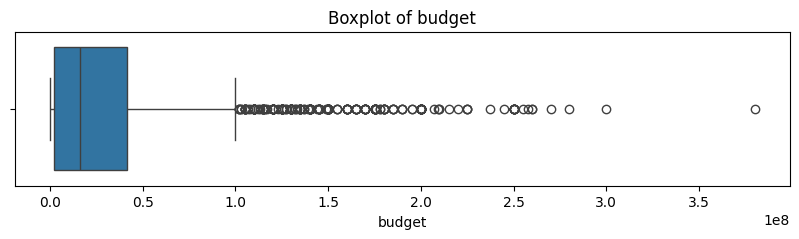

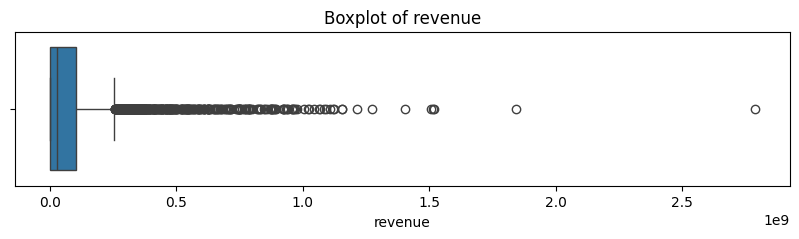

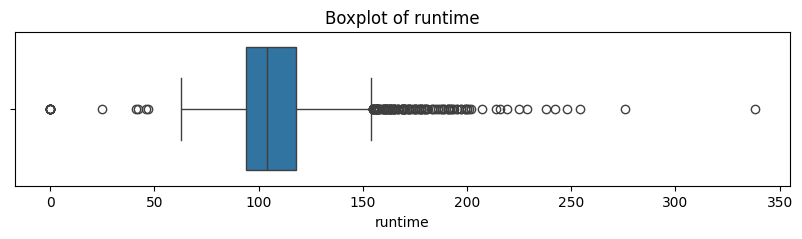

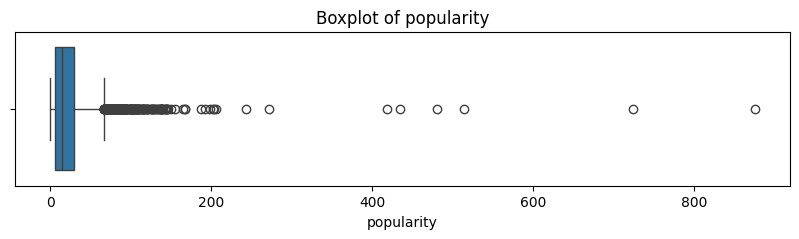

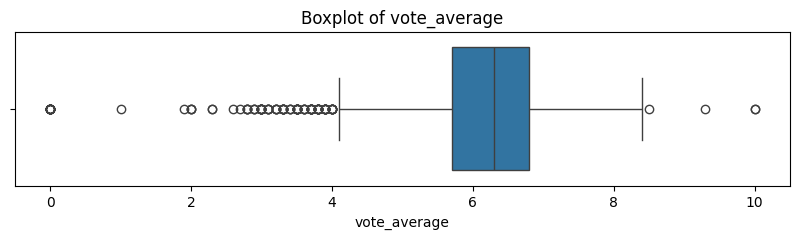

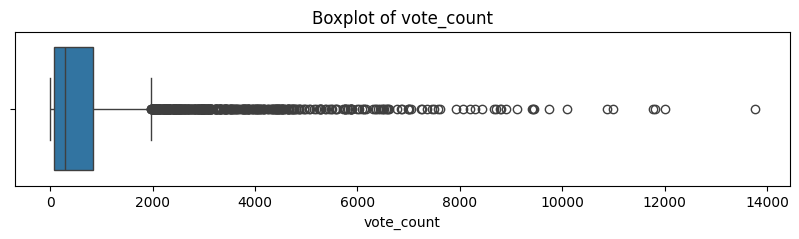

In [12]:
# Analysis of Numerical Features

numerical_features = ['budget', 'revenue', 'runtime', 'popularity', 'vote_average', 'vote_count']

# Histograms for each numerical feature
for col in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.histplot(movies_df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Box plots to visualize outliers
for col in numerical_features:
    plt.figure(figsize=(10, 2))
    sns.boxplot(x=movies_df[col].dropna())
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

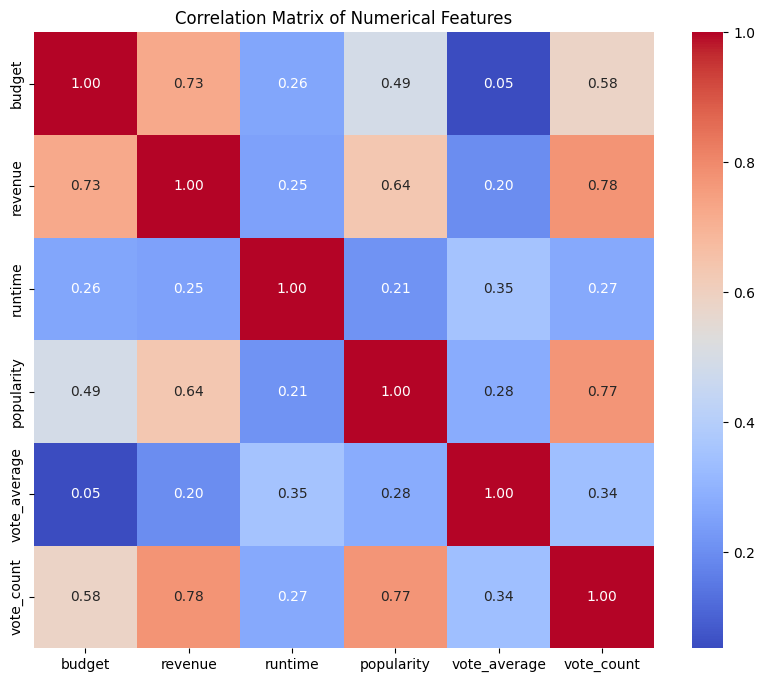

In [13]:
# Correlation Matrix and Heatmap
plt.figure(figsize=(10, 8))
corr_features = numerical_features
corr_matrix = movies_df[corr_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Content Based Recommendation 

In [14]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tanmaireddy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
movies_df.head(1)['overview']

0    In the 22nd century, a paraplegic Marine is di...
Name: overview, dtype: object

In [16]:
movies_df["overview"] = movies_df['overview'].apply(lambda x:x.split())
movies_df.head()

,index,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,19995,culture clash future space war space colony so...,en,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,206647,spy based on novel secret agent sequel mi6,en,Spectre,"[A, cryptic, message, from, Bond’s, past, send...",107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,880674609,148.0,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...",112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,49529,based on novel mars medallion space travel pri...,en,John Carter,"[John, Carter, is, a, war-weary,, former, mili...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,284139100,132.0,John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [17]:
movies_df["genres"] = movies_df['genres'].apply(lambda x:x.split())
movies_df.head()

,index,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,title,vote_average,vote_count,cast,crew,director
0,0,237000000,"[Action, Adventure, Fantasy, Science, Fiction]",19995,culture clash future space war space colony so...,en,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,"[Adventure, Fantasy, Action]",285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,"[Action, Adventure, Crime]",206647,spy based on novel secret agent sequel mi6,en,Spectre,"[A, cryptic, message, from, Bond’s, past, send...",107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,880674609,148.0,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,"[Action, Crime, Drama, Thriller]",49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...",112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,"[Action, Adventure, Science, Fiction]",49529,based on novel mars medallion space travel pri...,en,John Carter,"[John, Carter, is, a, war-weary,, former, mili...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,284139100,132.0,John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [18]:
movies_df["keywords"] = movies_df['keywords'].apply(lambda x:x.split())
movies_df.head()

,index,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,title,vote_average,vote_count,cast,crew,director
0,0,237000000,"[Action, Adventure, Fantasy, Science, Fiction]",19995,"[culture, clash, future, space, war, space, co...",en,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,"[Adventure, Fantasy, Action]",285,"[ocean, drug, abuse, exotic, island, east, ind...",en,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,"[Action, Adventure, Crime]",206647,"[spy, based, on, novel, secret, agent, sequel,...",en,Spectre,"[A, cryptic, message, from, Bond’s, past, send...",107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,880674609,148.0,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,"[Action, Crime, Drama, Thriller]",49026,"[dc, comics, crime, fighter, terrorist, secret...",en,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...",112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,"[Action, Adventure, Science, Fiction]",49529,"[based, on, novel, mars, medallion, space, tra...",en,John Carter,"[John, Carter, is, a, war-weary,, former, mili...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,284139100,132.0,John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [19]:
movies_df["cast"] = movies_df['cast'].apply(lambda x:x.split())
movies_df.head()

,index,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,title,vote_average,vote_count,cast,crew,director
0,0,237000000,"[Action, Adventure, Fantasy, Science, Fiction]",19995,"[culture, clash, future, space, war, space, co...",en,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,Avatar,7.2,11800,"[Sam, Worthington, Zoe, Saldana, Sigourney, We...","[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,"[Adventure, Fantasy, Action]",285,"[ocean, drug, abuse, exotic, island, east, ind...",en,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,"[Johnny, Depp, Orlando, Bloom, Keira, Knightle...","[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,"[Action, Adventure, Crime]",206647,"[spy, based, on, novel, secret, agent, sequel,...",en,Spectre,"[A, cryptic, message, from, Bond’s, past, send...",107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,880674609,148.0,Spectre,6.3,4466,"[Daniel, Craig, Christoph, Waltz, L\u00e9a, Se...","[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,"[Action, Crime, Drama, Thriller]",49026,"[dc, comics, crime, fighter, terrorist, secret...",en,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...",112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106,"[Christian, Bale, Michael, Caine, Gary, Oldman...","[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,"[Action, Adventure, Science, Fiction]",49529,"[based, on, novel, mars, medallion, space, tra...",en,John Carter,"[John, Carter, is, a, war-weary,, former, mili...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,284139100,132.0,John Carter,6.1,2124,"[Taylor, Kitsch, Lynn, Collins, Samantha, Mort...","[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [20]:
movies_df['tags']= movies_df['genres'] + movies_df['keywords'] + movies_df['overview'] + movies_df['cast'] 
movies_df.head()

,index,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,title,vote_average,vote_count,cast,crew,director,tags
0,0,237000000,"[Action, Adventure, Fantasy, Science, Fiction]",19995,"[culture, clash, future, space, war, space, co...",en,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,Avatar,7.2,11800,"[Sam, Worthington, Zoe, Saldana, Sigourney, We...","[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron,"[Action, Adventure, Fantasy, Science, Fiction,..."
1,1,300000000,"[Adventure, Fantasy, Action]",285,"[ocean, drug, abuse, exotic, island, east, ind...",en,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,"[Johnny, Depp, Orlando, Bloom, Keira, Knightle...","[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski,"[Adventure, Fantasy, Action, ocean, drug, abus..."
2,2,245000000,"[Action, Adventure, Crime]",206647,"[spy, based, on, novel, secret, agent, sequel,...",en,Spectre,"[A, cryptic, message, from, Bond’s, past, send...",107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,880674609,148.0,Spectre,6.3,4466,"[Daniel, Craig, Christoph, Waltz, L\u00e9a, Se...","[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes,"[Action, Adventure, Crime, spy, based, on, nov..."
3,3,250000000,"[Action, Crime, Drama, Thriller]",49026,"[dc, comics, crime, fighter, terrorist, secret...",en,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...",112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106,"[Christian, Bale, Michael, Caine, Gary, Oldman...","[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan,"[Action, Crime, Drama, Thriller, dc, comics, c..."
4,4,260000000,"[Action, Adventure, Science, Fiction]",49529,"[based, on, novel, mars, medallion, space, tra...",en,John Carter,"[John, Carter, is, a, war-weary,, former, mili...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,284139100,132.0,John Carter,6.1,2124,"[Taylor, Kitsch, Lynn, Collins, Samantha, Mort...","[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton,"[Action, Adventure, Science, Fiction, based, o..."


In [21]:
new_df = movies_df[['id','title','tags']]
new_df.head()

,id,title,tags
0,19995,Avatar,"[Action, Adventure, Fantasy, Science, Fiction,..."
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action, ocean, drug, abus..."
2,206647,Spectre,"[Action, Adventure, Crime, spy, based, on, nov..."
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller, dc, comics, c..."
4,49529,John Carter,"[Action, Adventure, Science, Fiction, based, o..."


In [22]:
# Function to preprocess text (remove punctuation, stopwords, lowercase)
import string
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    
    if isinstance(text, list):  
        text = " ".join(text) 
    
    text = text.lower()  
    text = text.translate(str.maketrans('', '', string.punctuation))  
    words = text.split()
    words = [word for word in words if word not in stop_words] 
    
    return " ".join(words)  

In [23]:
# Apply text preprocessing
movies_df['processed_tags'] = movies_df['tags'].apply(preprocess_text)

In [24]:
# TF-IDF Vectorization (bigram model for better context)
tfidf = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))  # Using unigrams + bigrams
tfidf_matrix = tfidf.fit_transform(movies_df['processed_tags'])

In [25]:
# Function to recommend movies
def recommend_movies(user_input, num_recommendations=5):
    user_input = preprocess_text(user_input)  
    user_vector = tfidf.transform([user_input])  
    
    # Compute similarity scores
    similarities = cosine_similarity(user_vector, tfidf_matrix)[0]
    
    # Boost scores based on vote_average & popularity
    scores = similarities * 0.7 + (movies_df['vote_average'] / 10) * 0.2 + (movies_df['popularity'] / max(movies_df['popularity'])) * 0.1
    
    # Sort movies by adjusted score
    movie_indices = np.argsort(scores)[::-1]
    
    recommendations = [(movies_df.iloc[i]['title'], scores[i]) for i in movie_indices[:num_recommendations]]

    return recommendations

In [29]:
# Example usage:
user_input = "I like action movies set in space"
recommended_movies = recommend_movies(user_input, num_recommendations=5)

# Display recommendations
for title, score in recommended_movies:
    print(f"Movie: {title}, Adjusted Score: {score:.2f}")

Movie: Guardians of the Galaxy, Adjusted Score: 0.16
Movie: Interstellar, Adjusted Score: 0.15
Movie: Gravity, Adjusted Score: 0.15
Movie: Grindhouse, Adjusted Score: 0.09
Movie: Minions, Adjusted Score: 0.15


In [31]:
# Example usage:
user_input2 = "Batman fighting crime in a dark city"
recommended_movies = recommend_movies(user_input2, num_recommendations=3)

# Display recommendations
for title, score in recommended_movies:
    print(f"Movie: {title}, Adjusted Score: {score:.2f}")

Movie: The Dark Knight Rises, Adjusted Score: 0.27
Movie: The Dark Knight, Adjusted Score: 0.26
Movie: Batman Returns, Adjusted Score: 0.14
